# Machine Learning Exercise - Support Vector Machines

The idea of this exercise is to use support vector machines (SVMs) to build a spam classifier.  

In [26]:
#imports
# import sio
import scipy.io as sio
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

We'll start with SVMs on some 2D data sets.  Then we'll do some pre-processing work on a set of raw emails and build a classifier using a SVM to determine if they are spam or not.

1) Load the dataset "session12_data1.mat". Explore the data and see how a linear SVM works on the data set for several values of C. Start from C=1. Compare the results and look at the confidence level for each class prediction. Comment the results.

In [21]:
# load dataset "session_12_data1.mat"
data = sio.loadmat('session_12_data1.mat')

# Explore the data structure
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

keys: X, which likely represents the features of the emails, and y, which represents the labels indicating whether an email is spam (1) or not spam (0).

In [23]:
# Extract features and labels
X = data['X']
y = data['y'].ravel()

# Check the shapes of the features and labels
X.shape, y.shape

((51, 2), (51,))

Evaluation Metrics for C=0.1 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



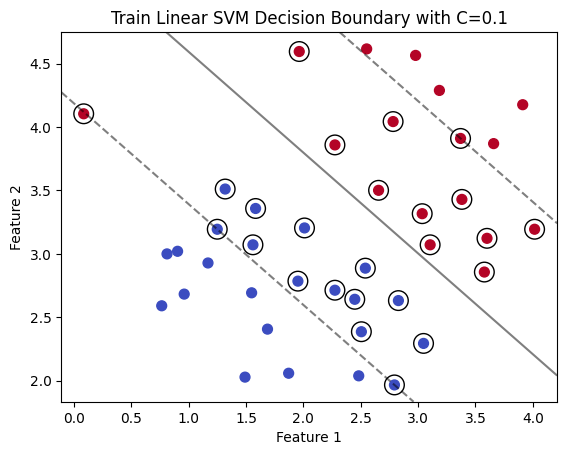

Evaluation Metrics for C=1 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



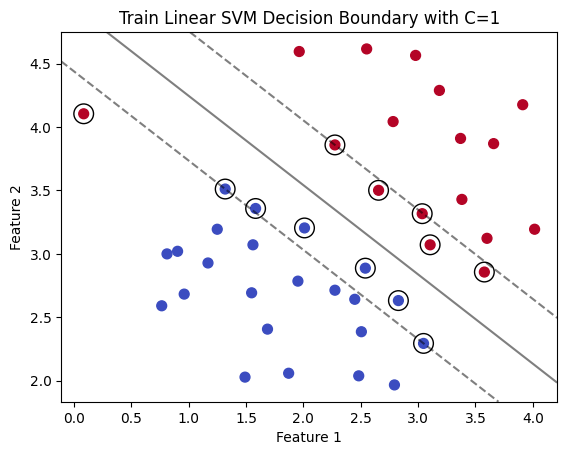

Evaluation Metrics for C=10 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



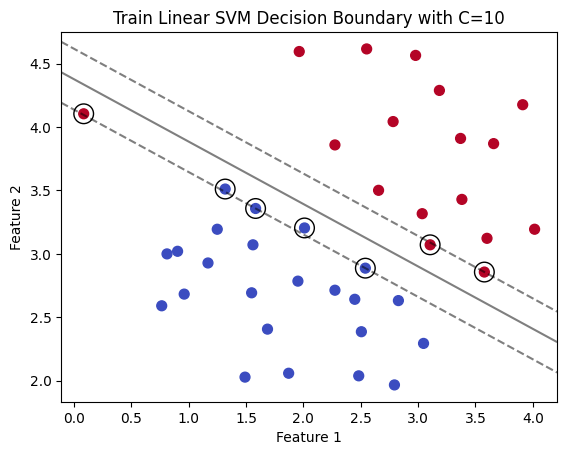

Evaluation Metrics for C=100 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



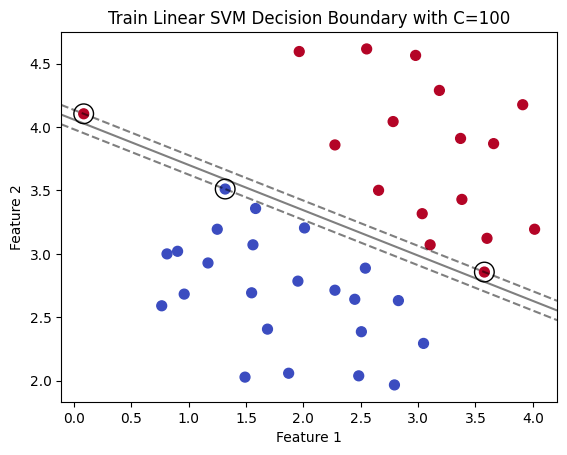

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modify the function to fit SVM on training data and evaluate on test data
def plot_and_evaluate_svm(X_train, y_train, X_test, y_test, C=1.0):
    # Fit the SVM model on training data
    svc = SVC(C=C, kernel='linear')
    svc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = svc.predict(X_test)
    print(f"Evaluation Metrics for C={C} on Test Data:\n")
    print(classification_report(y_test, y_pred))
    
    # Plot decision boundary using training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svc.decision_function(xy).reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Train Linear SVM Decision Boundary with C={C}')
    plt.show()

# Values of C to test and compare
C_values = [0.1, 1, 10, 100]

# Plot decision boundaries for different values of C
for C in C_values:
    plot_and_evaluate_svm(X_train, y_train, X_test, y_test, C)


My observations:

- **\(C=0.1\)**: has a larger margin between the classes but might be more tolerant to misclassifications (higher bias and lower variance). This setting indicates a softer margin that allows more misclassifications but aims for a broader generalization.

- **\(C=1\)**: Increasing \(C\) to 1 tightens the margin while still trying to balance between a good separation and minimizing the classification error. This is a middle ground in terms of bias and variance.

- **\(C=10\)** and **\(C=100\)**: With \(C=10\) and \(C=100\), the decision boundary becomes more sensitive to the individual data points, leading to a narrower margin. This indicates a hard margin that aims to correctly classify all training examples, potentially at the cost of overfitting (lower bias but higher variance).

A lower \(C\) value leads to a model with a wider margin that may misclassify more training examples but could generalize better on unseen data (more robust to overfitting). In contrast, a higher \(C\) value aims for a stricter classification of the training data, potentially reducing generalization due to overfitting.

The evaluation metrics suggest that as \(C\) increases, the model's ability to classify the training data improves, culminating in a perfect classification rate for \(C=100\). However, it's important to consider the potential for overfitting at higher \(C\) values, as the model becomes increasingly sensitive to the training data. While a perfect classification rate on the training data may seem ideal, it's essential to validate these results on a separate test set to ensure that the model retains its performance on unseen data and to gauge its generalization ability accurately.

2) Move from a linear SVM to one that's capable of non-linear classification using kernels. Test the gaussian kernel function. Comment the results.

3) Examine another data set, this time with a non-linear decision boundary: "session12_data2.mat". Explore the data and use a Gaussian kernel with the SVM for classification. Comment the results.

4) Load the third data set "session12_data3.mat". Here we have training and validation sets and our task is to use the cross validation set to determine the best C and σ parameter to use, based on validation set performance.

5) Finally, we implement a spam classifier with a SVM. Use the data "session12_spamTrain.mat" and "session12_spamTest.mat".